In [1]:
import pandas as pd


C:\Users\danie\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\danie\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
#https://www.kaggle.com/datasets/georgesaavedra/covid19-dataset
covid_data = pd.read_csv("covid19_dataset/covid-data.csv")

#https://www.kaggle.com/datasets/gpreda/covid-world-vaccination-progress
vaccines_data= pd.read_csv("covid19_dataset/country_vaccinations.csv")

#https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset
world_statistics =pd.read_csv("covid19_dataset/world_population.csv")

In [3]:
first_dataset_shape = covid_data.shape
second_dataset_shape = vaccines_data.shape
third_dataset_shape = world_statistics.shape
print(f"First dataset (covid data) is {first_dataset_shape}")
print(f"Second dataset (vaccines data) is {second_dataset_shape}")
print(f"Third dataset (population data) is {third_dataset_shape}")

First dataset (covid data) is (166326, 67)
Second dataset (vaccines data) is (86512, 15)
Third dataset (population data) is (234, 17)


In [4]:

#creating a dataframe that contains data about covid cases and deaths per date and country
columns_that_I_want = ["date","iso_code","location","continent","new_cases","total_cases","new_deaths","total_deaths"]
covid_data = covid_data[columns_that_I_want]

In [5]:
#creating a dataframe that contains data about vaccination per date and country
columns_that_I_want =["date", "iso_code","total_vaccinations","people_vaccinated","people_fully_vaccinated"]
vaccines_data = vaccines_data[columns_that_I_want]

In [6]:
#creating a dataframe that contains country code and population
columns_that_I_want = ["CCA3", "2020 Population","2022 Population"]
world_statistics = world_statistics[columns_that_I_want]

In [7]:
first_dataset_shape = covid_data.shape
second_dataset_shape = vaccines_data.shape
third_dataset_shape = world_statistics.shape
print(f"First dataset (covid data) is {first_dataset_shape}")
print(f"Second dataset (vaccines data) is {second_dataset_shape}")
print(f"Third dataset (population data) is {third_dataset_shape}")


First dataset (covid data) is (166326, 8)
Second dataset (vaccines data) is (86512, 5)
Third dataset (population data) is (234, 3)


In [8]:
#merging my dataframes based on their country code and date
first_merge_df = pd.merge(covid_data, vaccines_data, on=['iso_code',"date"], how='left')
first_merge_df.shape

(166326, 11)

In [9]:
first_merge_df


,date,iso_code,location,continent,new_cases,total_cases,new_deaths,total_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,2020-02-24,AFG,Afghanistan,Asia,5.0,5.0,NaN,NaN,NaN,NaN,NaN
1,2020-02-25,AFG,Afghanistan,Asia,0.0,5.0,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,AFG,Afghanistan,Asia,0.0,5.0,NaN,NaN,NaN,NaN,NaN
3,2020-02-27,AFG,Afghanistan,Asia,0.0,5.0,NaN,NaN,NaN,NaN,NaN
4,2020-02-28,AFG,Afghanistan,Asia,0.0,5.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
166321,2022-03-01,ZWE,Zimbabwe,Africa,491.0,236871.0,0.0,5395.0,7901360.0,4365856.0,3399915.0
166322,2022-03-02,ZWE,Zimbabwe,Africa,632.0,237503.0,1.0,5396.0,7910740.0,4368726.0,3402434.0
166323,2022-03-03,ZWE,Zimbabwe,Africa,0.0,237503.0,0.0,5396.0,7921113.0,4372925.0,3406482.0
166324,2022-03-04,ZWE,Zimbabwe,Africa,1236.0,238739.0,1.0,5397.0,7930621.0,4374896.0,3408609.0


In [10]:
second_merge_df = pd.merge(first_merge_df, world_statistics, left_on=['iso_code'], right_on=['CCA3'],how='inner')
columns_to_drop = ['CCA3']
# Dropping column that would become a duplicate
second_merge_df = second_merge_df.drop(columns=columns_to_drop)
second_merge_df.shape

(153998, 13)

In [63]:
second_merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153998 entries, 0 to 153997
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date                     153998 non-null  object 
 1   iso_code                 153998 non-null  object 
 2   location                 153998 non-null  object 
 3   continent                153998 non-null  object 
 4   new_cases                151207 non-null  float64
 5   total_cases              151374 non-null  float64
 6   new_deaths               134297 non-null  float64
 7   total_deaths             134459 non-null  float64
 8   total_vaccinations       80190 non-null   float64
 9   people_vaccinated        79504 non-null   float64
 10  people_fully_vaccinated  69978 non-null   float64
 11  2020 Population          153998 non-null  int64  
 12  2022 Population          153998 non-null  int64  
dtypes: float64(7), int64(2), object(4)
memory usage: 15.3+ MB


In [61]:
#selecting all columns with numeric value that are a sum of the values that came before them:
columns_to_ffill_by_country = ['total_cases', 'total_deaths','total_vaccinations','people_vaccinated','people_fully_vaccinated']
merged_with_groupby_ffill = second_merge_df
merged_with_groupby_ffill[columns_to_ffill_by_country] = second_merge_df.groupby('iso_code')[columns_to_ffill_by_country].ffill()


In [62]:
merged_with_groupby_ffill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153998 entries, 0 to 153997
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date                     153998 non-null  object 
 1   iso_code                 153998 non-null  object 
 2   location                 153998 non-null  object 
 3   continent                153998 non-null  object 
 4   new_cases                151207 non-null  float64
 5   total_cases              151374 non-null  float64
 6   new_deaths               134297 non-null  float64
 7   total_deaths             134459 non-null  float64
 8   total_vaccinations       80190 non-null   float64
 9   people_vaccinated        79504 non-null   float64
 10  people_fully_vaccinated  69978 non-null   float64
 11  2020 Population          153998 non-null  int64  
 12  2022 Population          153998 non-null  int64  
dtypes: float64(7), int64(2), object(4)
memory usage: 15.3+ MB


In [64]:
merged_with_groupby_ffill_no_nan = merged_with_groupby_ffill.fillna(0)
merged_with_groupby_ffill_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153998 entries, 0 to 153997
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date                     153998 non-null  object 
 1   iso_code                 153998 non-null  object 
 2   location                 153998 non-null  object 
 3   continent                153998 non-null  object 
 4   new_cases                153998 non-null  float64
 5   total_cases              153998 non-null  float64
 6   new_deaths               153998 non-null  float64
 7   total_deaths             153998 non-null  float64
 8   total_vaccinations       153998 non-null  float64
 9   people_vaccinated        153998 non-null  float64
 10  people_fully_vaccinated  153998 non-null  float64
 11  2020 Population          153998 non-null  int64  
 12  2022 Population          153998 non-null  int64  
dtypes: float64(7), int64(2), object(4)
memory usage: 15.3+ MB


In [14]:
#When I use inner merge I can get rid of all of those "Countries"
#OWID stands for Our World In Data and it's one of our sources for the dataset
result = second_merge_df[second_merge_df['2020 Population'].isna()]['iso_code'].unique()
result

array([], dtype=object)

In [49]:
second_merge_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153998 entries, 0 to 153997
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date                     153998 non-null  object 
 1   iso_code                 153998 non-null  object 
 2   location                 153998 non-null  object 
 3   continent                153998 non-null  object 
 4   new_cases                151207 non-null  float64
 5   total_cases              151374 non-null  float64
 6   new_deaths               134297 non-null  float64
 7   total_deaths             134459 non-null  float64
 8   total_vaccinations       80190 non-null   float64
 9   people_vaccinated        79504 non-null   float64
 10  people_fully_vaccinated  69978 non-null   float64
 11  2020 Population          153998 non-null  int64  
 12  2022 Population          153998 non-null  int64  
dtypes: float64(7), int64(2), object(4)
memory usage: 15.3+ MB


In [15]:
first_merge_df.info()
second_merge_df.info()
merged_with_groupby_ffill_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166326 entries, 0 to 166325
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date                     166326 non-null  object 
 1   iso_code                 166326 non-null  object 
 2   location                 166326 non-null  object 
 3   continent                156370 non-null  object 
 4   new_cases                163133 non-null  float64
 5   total_cases              163293 non-null  float64
 6   new_deaths               145487 non-null  float64
 7   total_deaths             145451 non-null  float64
 8   total_vaccinations       39897 non-null   float64
 9   people_vaccinated        37661 non-null   float64
 10  people_fully_vaccinated  35123 non-null   float64
dtypes: float64(7), object(4)
memory usage: 14.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153998 entries, 0 to 153997
Data columns (total 13 columns):
 #   Colum

In [16]:
final_df = merged_with_groupby_ffill_no_nan
columns_to_convert= ["new_cases","total_cases","new_deaths","total_deaths","total_vaccinations","people_vaccinated","people_fully_vaccinated"]
final_df[columns_to_convert] = merged_with_groupby_ffill_no_nan[columns_to_convert].astype(int)


In [17]:
import matplotlib.pyplot as plt

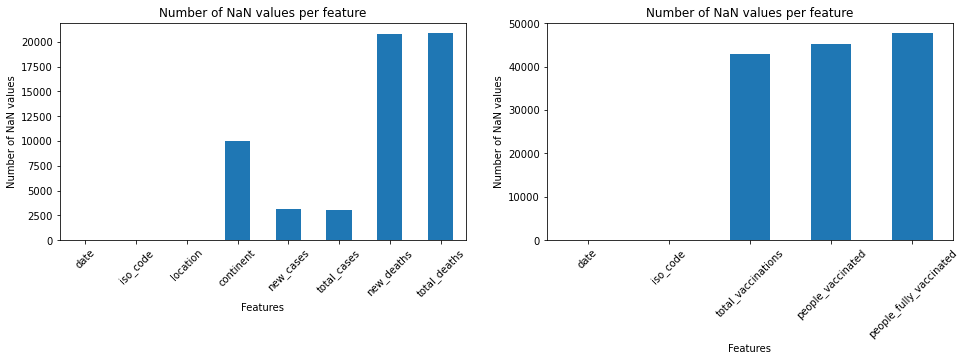

In [18]:
nan_count1 = covid_data.isna().sum()
nan_count2 = vaccines_data.isna().sum()

fig, ax = plt.subplots(1, 2, figsize=(16, 4))
# Plotting
nan_count1.plot(kind='bar',ax=ax[0],)
ax[0].tick_params(axis='x' ,rotation=45)
ax[0].set_title('Number of NaN values per feature')
ax[0].set_xlabel('Features')
ax[0].set_ylabel('Number of NaN values')


nan_count2.plot(kind='bar',ax=ax[1],)
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_title('Number of NaN values per feature')
ax[1].set_xlabel('Features')
ax[1].set_ylabel('Number of NaN values')

plt.show()

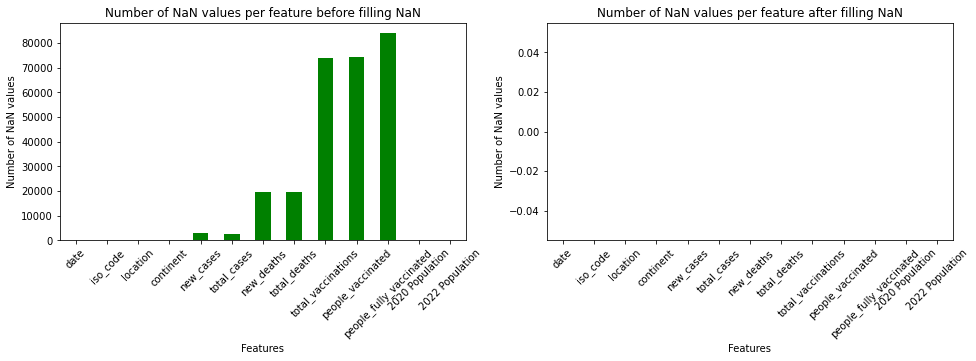

In [31]:
nan_count1 = second_merge_df.isna().sum()
nan_count2 = final_df.isna().sum()

fig, ax = plt.subplots(1, 2, figsize=(16, 4))
# Plotting
nan_count1.plot(kind='bar',ax=ax[0],color= "green")
ax[0].tick_params(axis='x' ,rotation=45)
ax[0].set_title('Number of NaN values per feature before filling NaN')
ax[0].set_xlabel('Features')
ax[0].set_ylabel('Number of NaN values')


nan_count2.plot(kind='bar',ax=ax[1],color= "green")
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_title('Number of NaN values per feature after filling NaN')
ax[1].set_xlabel('Features')
ax[1].set_ylabel('Number of NaN values')

plt.show()

In [44]:
sorted_df= final_df.sort_values(by=["total_deaths"], ascending=[False])
top_10_countries_df = sorted_df.drop_duplicates(subset='iso_code').head(10)
top_10_countries_df

,date,iso_code,location,continent,new_cases,total_cases,new_deaths,total_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,2020 Population,2022 Population
147215,2022-03-05,USA,United States,North America,15217,79265726,293,958437,556657133,254411497,216594420,335942003,338289857
19818,2022-03-05,BRA,Brazil,South America,62748,29040800,694,652216,395464826,178203894,155711613,213196304,215313498
65894,2022-03-05,IND,India,Asia,5476,42962953,158,515036,1786849348,967153861,800304849,1396387127,1417173173
115026,2022-03-05,RUS,Russia,Europe,85575,16619507,737,348467,161195872,78750034,72101180,145617329,144713314
91249,2022-03-05,MEX,Mexico,North America,9748,5554392,308,319604,183043385,85315634,79050604,125998302,127504125
110552,2022-03-04,PER,Peru,South America,3763,3522484,163,210907,62710846,27795855,24551495,33304756,34049588
146440,2022-03-04,GBR,United Kingdom,Europe,44806,19172095,110,162152,140075947,52660741,49078128,67059474,67508936
71077,2022-03-05,ITA,Italy,Europe,41364,12990223,173,155782,134591094,50656034,47596432,59500579,59037474
66628,2022-03-05,IDN,Indonesia,Asia,30156,5723858,322,149918,352266904,191835428,147280509,271857970,275501339
50835,2022-03-05,FRA,France,Europe,53678,23064766,120,139312,141051582,53965831,52355069,64480053,64626628


In [46]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153998 entries, 0 to 153997
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   date                     153998 non-null  object
 1   iso_code                 153998 non-null  object
 2   location                 153998 non-null  object
 3   continent                153998 non-null  object
 4   new_cases                153998 non-null  int32 
 5   total_cases              153998 non-null  int32 
 6   new_deaths               153998 non-null  int32 
 7   total_deaths             153998 non-null  int32 
 8   total_vaccinations       153998 non-null  int32 
 9   people_vaccinated        153998 non-null  int32 
 10  people_fully_vaccinated  153998 non-null  int32 
 11  2020 Population          153998 non-null  int64 
 12  2022 Population          153998 non-null  int64 
dtypes: int32(7), int64(2), object(4)
memory usage: 11.2+ MB


In [21]:
df_one_hot_regions = pd.get_dummies(final_df['continent'], prefix='continent')

final_df_one_hot = pd.concat([final_df, df_one_hot_regions], axis=1)

In [22]:
final_df_one_hot

,date,iso_code,location,continent,new_cases,total_cases,new_deaths,total_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,2020 Population,2022 Population,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
0,2020-02-24,AFG,Afghanistan,Asia,5,5,0,0,0,0,0,38972230,41128771,False,True,False,False,False,False
1,2020-02-25,AFG,Afghanistan,Asia,0,5,0,0,0,0,0,38972230,41128771,False,True,False,False,False,False
2,2020-02-26,AFG,Afghanistan,Asia,0,5,0,0,0,0,0,38972230,41128771,False,True,False,False,False,False
3,2020-02-27,AFG,Afghanistan,Asia,0,5,0,0,0,0,0,38972230,41128771,False,True,False,False,False,False
4,2020-02-28,AFG,Afghanistan,Asia,0,5,0,0,0,0,0,38972230,41128771,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153993,2022-03-01,ZWE,Zimbabwe,Africa,491,236871,0,5395,7901360,4365856,3399915,15669666,16320537,True,False,False,False,False,False
153994,2022-03-02,ZWE,Zimbabwe,Africa,632,237503,1,5396,7910740,4368726,3402434,15669666,16320537,True,False,False,False,False,False
153995,2022-03-03,ZWE,Zimbabwe,Africa,0,237503,0,5396,7921113,4372925,3406482,15669666,16320537,True,False,False,False,False,False
153996,2022-03-04,ZWE,Zimbabwe,Africa,1236,238739,1,5397,7930621,4374896,3408609,15669666,16320537,True,False,False,False,False,False


In [23]:
merged_with_groupby_ffill_no_nan.to_csv('ffill_data.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'ffill_data.csv'

In [ ]:
pip install --upgrade scikit-learn

In [ ]:
final_df_numeric_only = final_df_one_hot.drop(["date","iso_code","location","continent"], axis=1)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# standardizing the data 
scaler = StandardScaler()
df_standardized = scaler.fit_transform(final_df_numeric_only)

# Create a PCA instance with the desired number of components
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_standardized)



In [ ]:
# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=df_pca, columns=['pc1','pc2','pc3'])

# Display the loadings of each original variable on each principal component
loadings_df = pd.DataFrame(pca.components_.T, columns=['PC1 Loading', 'PC2 Loading','PC3 Loading'], index=final_df_numeric_only.columns)



In [ ]:
df_pca

In [ ]:
loadings_df

In [ ]:
pca.explained_variance_ratio_

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_

# Display the explained variance ratio for each principal component
print("Explained Variance Ratio:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i + 1}: {ratio:.4f}")